In [3]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# XGBoost
from xgboost import XGBClassifier

# Model saving
import joblib

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [5]:
# Load processed dataset
data_path = r"C:\Users\ujjwa\Desktop\PythonWorkSpace\preprocessed.csv"
df = pd.read_csv(data_path)

# Display first few rows
df.head()


,planet_radius_earth,planet_mass_earth,orbital_period_days,semi_major_axis_AU,equilibrium_temp_K,planet_density,star_temp_K,star_luminosity,star_metallicity,star_F,star_G,star_K,star_M,target_habitable
0,0.502742,0.0,0.001939,0.017215,0.0,0.0,0.300172,0.750811,0.462500,False,True,False,False,0
1,0.502742,0.0,0.001956,0.018863,0.0,0.0,0.254733,0.802255,0.406250,False,True,False,False,0
2,0.502742,0.0,0.000060,0.017686,0.0,0.0,0.554561,0.350352,0.622563,False,True,False,False,0
3,0.502742,0.0,0.003098,0.022542,0.0,0.0,0.116351,0.350352,0.650000,False,False,True,False,0
4,0.502742,0.0,0.003098,0.022395,0.0,0.0,0.072633,0.350352,0.612500,False,True,False,False,0


In [9]:
# Target variable
target_column = "target_habitable"

# Features and labels
X = df.drop(columns=[target_column])
y = df[target_column]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (16973, 13)
Target shape: (16973,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])



Training samples: 13578
Testing samples: 3395


In [11]:
baseline_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression())
])

baseline_pipeline.fit(X_train, y_train)

y_pred_lr = baseline_pipeline.predict(X_test)

print("Baseline Logistic Regression Performance")
print(classification_report(y_test, y_pred_lr))


Baseline Logistic Regression Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3391
           1       0.00      0.00      0.00         4

    accuracy                           1.00      3395
   macro avg       0.50      0.50      0.50      3395
weighted avg       1.00      1.00      1.00      3395



In [12]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Baseline Decision Tree Performance")
print(classification_report(y_test, y_pred_dt))


Baseline Decision Tree Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3391
           1       1.00      1.00      1.00         4

    accuracy                           1.00      3395
   macro avg       1.00      1.00      1.00      3395
weighted avg       1.00      1.00      1.00      3395



In [13]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Performance")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3391
           1       0.00      0.00      0.00         4

    accuracy                           1.00      3395
   macro avg       0.50      0.50      0.50      3395
weighted avg       1.00      1.00      1.00      3395



In [14]:
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print("XGBoost Performance")
print(classification_report(y_test, y_pred_xgb))


XGBoost Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3391
           1       0.75      0.75      0.75         4

    accuracy                           1.00      3395
   macro avg       0.87      0.87      0.87      3395
weighted avg       1.00      1.00      1.00      3395



In [16]:
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"\n{model_name} Evaluation Metrics")
    print("-" * 40)
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_true, y_prob))


In [17]:
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")



Random Forest Evaluation Metrics
----------------------------------------
Accuracy : 0.9988217967599411
Precision: 0.0
Recall   : 0.0
F1-score : 0.0
ROC-AUC  : 1.0

XGBoost Evaluation Metrics
----------------------------------------
Accuracy : 0.9994108983799705
Precision: 0.75
Recall   : 0.75
F1-score : 0.75
ROC-AUC  : 0.9998525508699498


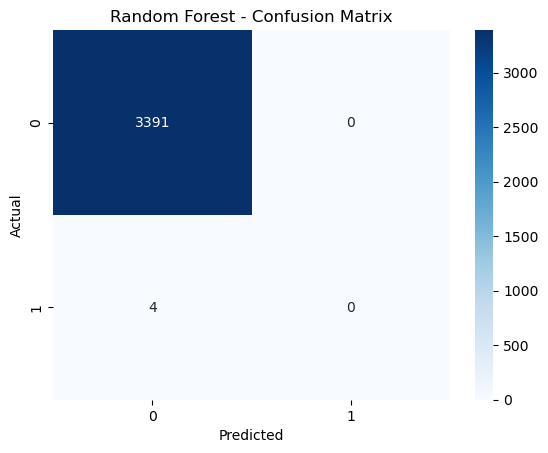

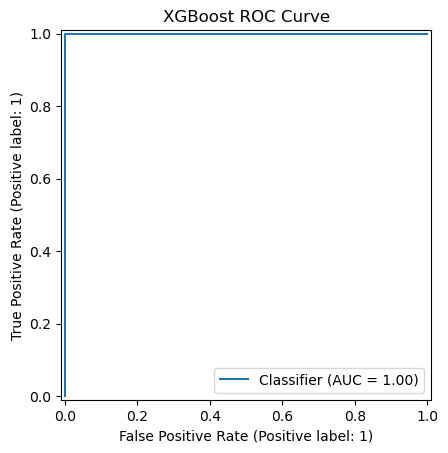

In [18]:
# Confusion Matrix - Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve - XGBoost
RocCurveDisplay.from_predictions(y_test, y_prob_xgb)
plt.title("XGBoost ROC Curve")
plt.show()


In [20]:
import joblib

joblib.dump(rf, "random_forest.pkl")
joblib.dump(xgb, "xgboost.pkl")

print("Models saved successfully in current directory")


Models saved successfully in current directory


In [22]:
df_ranked.to_csv("habitability_ranked.csv", index=False)


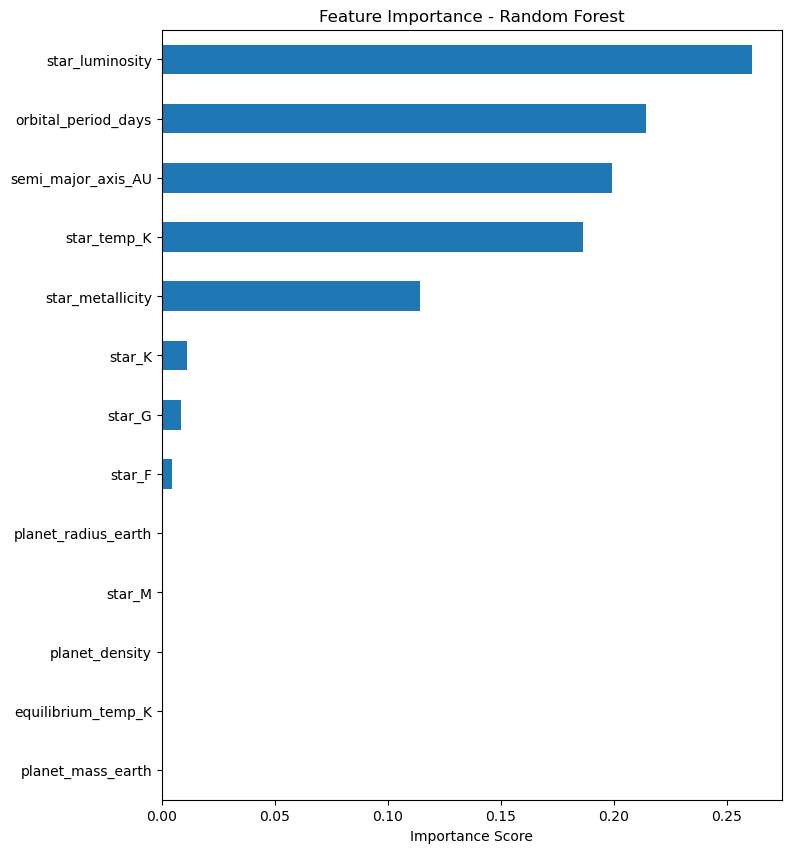

In [23]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=True)

plt.figure(figsize=(8, 10))
feature_importance.plot(kind="barh")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()
